Step 1: Data loaded successfully. 
 Number of rows: 649

Step 2: Missing numeric values handled successfully.
Missing data handled using SimpleImputer (mean strategy)

Step 3: Categorical columns encoded successfully with Label Encoding.
Number of rows after cleaning: 649

Step 4: Feature selection done successfully.
Selected Features:
 ['G2', 'G1', 'higher', 'studytime']
Step 5: Data split into training and testing sets successfully.
Training samples: 519, Testing samples: 130

Step 6: Feature scaling done successfully.

Step 7: Model trained successfully.


Sample predictions on test set (10 rows):
   Actual  Predicted
0    19.0  18.605959
1    12.0  11.356614
2    18.0  18.788021
3    11.0  11.174553
4    11.0  11.720736
5    17.0  16.773621
6    18.0  17.726391
7     8.0   9.409203
8    10.0  10.294985
9    11.0  10.477046

Step 8: Model evaluation done successfully.

R² Score: 0.860
MAE: 0.745
RMSE: 1.170



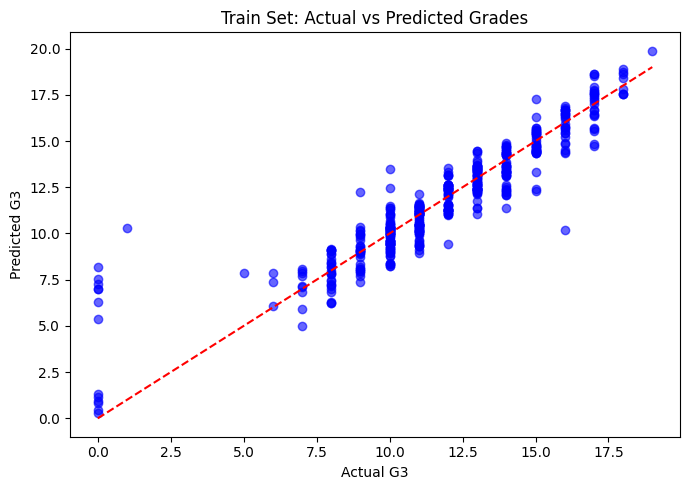

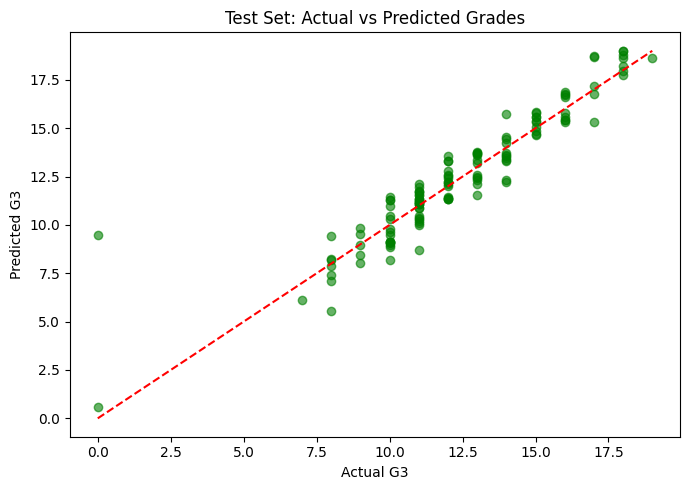

Step 9: Visualization completed successfully.


Enter values to predict G3 grade:

Predicted Final Grade (G3): 10.51


In [4]:
# ==============================
# STUDENT PERFORMANCE REGRESSION
# ==============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ==============================
# LOAD DATA
# ==============================
df = pd.read_csv("student-por.csv.csv")
df.columns = df.columns.str.strip()
print("="*70)
print(f"Step 1: Data loaded successfully. ")
print(f" Number of rows: {len(df)}\n")



# ==============================
# PREPROCESSING
# ==============================
# Handle missing values (numeric only)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = SimpleImputer(strategy="mean").fit_transform(df[num_cols])
print("="*70)
print("Step 2: Missing numeric values handled successfully.")
print(f"Missing data handled using SimpleImputer (mean strategy)\n")

# ==============================
# ONE-HOT ENCODING (INSTEAD OF LABEL ENCODING)
# ==============================
cat_cols = df.select_dtypes(include="object").columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("="*70)
print("Step 3: Categorical columns encoded successfully using One-Hot Encoding.")
print(f"Number of rows after cleaning: {len(df)}\n")

# ==============================
# FEATURE SELECTION
# ==============================
corr = df.corr()["G3"].sort_values(ascending=False)
important_features = corr.drop("G3").head(4).index.tolist()
print("="*70)
print("Step 4: Feature selection done successfully.")
print("Selected Features:\n", important_features)

# ==============================
# TRAIN / TEST SPLIT
# ==============================
X = df[important_features].values
y = df["G3"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("="*70)
print(f"Step 5: Data split into training and testing sets successfully.")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}\n")

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("="*70)
print("Step 6: Feature scaling done successfully.\n")


# ==============================
# MODEL TRAINING
# ==============================
model = LinearRegression()
model.fit(X_train, y_train)
print("="*70)
print("Step 7: Model trained successfully.\n")

# ==============================
# PREDICTION
# ==============================
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Sample prediction table (10 rows)
pred_table = pd.DataFrame({
    "Actual": y_test[:10],
    "Predicted": y_test_pred[:10]
})
print("="*70)
print("\nSample predictions on test set (10 rows):")
print(pred_table)

# ==============================
# EVALUATION
# ==============================
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("="*70)
print("\nStep 8: Model evaluation done successfully.\n")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}\n")
print("="*70)

# ==============================
# VISUALIZATION
# ==============================
plt.figure(figsize=(7,5))
plt.scatter(y_train, y_train_pred, alpha=0.6, color='blue')
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Train Set: Actual vs Predicted Grades")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Test Set: Actual vs Predicted Grades")
plt.tight_layout()
plt.show()
print("Step 9: Visualization completed successfully.\n")
print("="*70)

# ==============================
# USER INPUT PREDICTION (binary or numeric)
# ==============================
print("\nEnter values to predict G3 grade:")

user_data = []

for feat in important_features:
    min_val = df[feat].min()
    max_val = df[feat].max()
    
    while True:
        try:
            # If feature is binary
            if set(df[feat].unique()) <= {0, 1}:
                val = int(input(f"{feat} (binary: enter 0 or 1 only): "))
                if val not in [0, 1]:
                    print("⚠ Invalid input! Please enter 0 or 1 only.")
                else:
                    user_data.append(val)
                    break
            # If feature is numeric
            else:
                val = float(input(f"{feat} (range {min_val} - {max_val}): "))
                if val < min_val or val > max_val:
                    print(f"⚠ Value out of range! Please enter between {min_val} and {max_val}.")
                else:
                    user_data.append(val)
                    break
        except ValueError:
            print("⚠ Invalid input! Please enter a numeric value.")

user_data = scaler.transform(np.array(user_data).reshape(1, -1))
prediction = model.predict(user_data)[0]

print(f"\nPredicted Final Grade (G3): {prediction:.2f}")


print("="*70)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [5]:
# ==============================
# LOAD DATA
# ==============================
df = pd.read_csv("student-por.csv")
df.columns = df.columns.str.strip()
print("="*70)
print(f"Step 1: Data loaded successfully. ")
print(f" Number of rows: {len(df)}\n")

Step 1: Data loaded successfully. 
 Number of rows: 649



In [6]:
# ==============================
# PREPROCESSING
# ==============================
# Handle missing values (numeric only)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = SimpleImputer(strategy="mean").fit_transform(df[num_cols])
print("="*70)
print("Step 2: Missing numeric values handled successfully.")
print(f"Missing data handled using SimpleImputer (mean strategy)\n")

# ==============================
# ONE-HOT ENCODING (INSTEAD OF LABEL ENCODING)
# ==============================
cat_cols = df.select_dtypes(include="object").columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("="*70)
print("Step 3: Categorical columns encoded successfully using One-Hot Encoding.")
print(f"Number of rows after cleaning: {len(df)}\n")


Step 2: Missing numeric values handled successfully.
Missing data handled using SimpleImputer (mean strategy)

Step 3: Categorical columns encoded successfully with Label Encoding.
Number of rows after cleaning: 649



In [7]:
# ==============================
# FEATURE SELECTION
# ==============================
corr = df.corr()["G3"].sort_values(ascending=False)
important_features = corr.drop("G3").head(4).index.tolist()
print("="*70)
print("Step 4: Feature selection done successfully.")
print("Selected Features:\n", important_features)

Step 4: Feature selection done successfully.
Selected Features:
 ['G2', 'G1', 'higher', 'studytime']


In [8]:
# ==============================
# TRAIN / TEST SPLIT
# ==============================
X = df[important_features].values
y = df["G3"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("="*70)
print(f"Step 5: Data split into training and testing sets successfully.")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}\n")

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("="*70)
print("Step 6: Feature scaling done successfully.\n")


Step 5: Data split into training and testing sets successfully.
Training samples: 519, Testing samples: 130

Step 6: Feature scaling done successfully.



In [9]:
# ==============================
# MODEL TRAINING
# ==============================
model = LinearRegression()
model.fit(X_train, y_train)
print("="*70)
print("Step 7: Model trained successfully.\n")

Step 7: Model trained successfully.



In [10]:
# ==============================
# PREDICTION
# ==============================
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Sample prediction table (10 rows)
pred_table = pd.DataFrame({
    "Actual": y_test[:10],
    "Predicted": y_test_pred[:10]
})
print("="*70)
print("\nSample predictions on test set (10 rows):")
print(pred_table)


Sample predictions on test set (10 rows):
   Actual  Predicted
0    19.0  18.605959
1    12.0  11.356614
2    18.0  18.788021
3    11.0  11.174553
4    11.0  11.720736
5    17.0  16.773621
6    18.0  17.726391
7     8.0   9.409203
8    10.0  10.294985
9    11.0  10.477046


In [11]:
# ==============================
# EVALUATION
# ==============================
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("="*70)
print("\nStep 8: Model evaluation done successfully.\n")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}\n")
print("="*70)


Step 8: Model evaluation done successfully.

R² Score: 0.860
MAE: 0.745
RMSE: 1.170



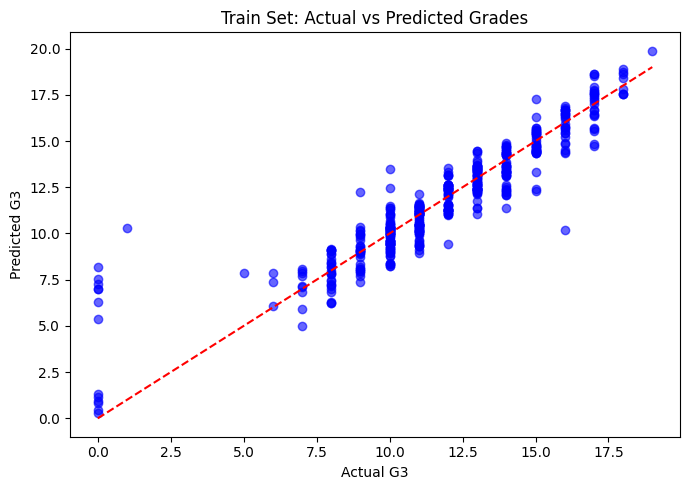

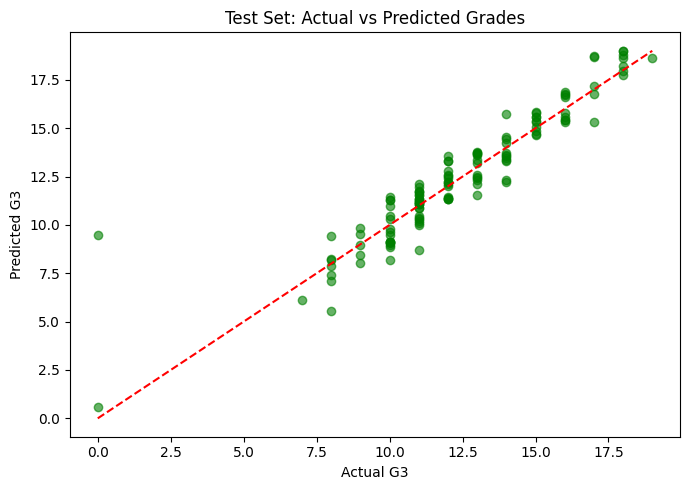

Step 9: Visualization completed successfully.



In [12]:
# ==============================
# VISUALIZATION
# ==============================
plt.figure(figsize=(7,5))
plt.scatter(y_train, y_train_pred, alpha=0.6, color='blue')
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Train Set: Actual vs Predicted Grades")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Test Set: Actual vs Predicted Grades")
plt.tight_layout()
plt.show()
print("Step 9: Visualization completed successfully.\n")
print("="*70)

In [13]:
# ==============================
# USER INPUT PREDICTION (binary or numeric)
# ==============================
print("\nEnter values to predict G3 grade:")

user_data = []

for feat in important_features:
    min_val = df[feat].min()
    max_val = df[feat].max()
    
    while True:
        try:
            # If feature is binary
            if set(df[feat].unique()) <= {0, 1}:
                val = int(input(f"{feat} (binary: enter 0 or 1 only): "))
                if val not in [0, 1]:
                    print("⚠ Invalid input! Please enter 0 or 1 only.")
                else:
                    user_data.append(val)
                    break
            # If feature is numeric
            else:
                val = float(input(f"{feat} (range {min_val} - {max_val}): "))
                if val < min_val or val > max_val:
                    print(f"⚠ Value out of range! Please enter between {min_val} and {max_val}.")
                else:
                    user_data.append(val)
                    break
        except ValueError:
            print("⚠ Invalid input! Please enter a numeric value.")

user_data = scaler.transform(np.array(user_data).reshape(1, -1))
prediction = model.predict(user_data)[0]

print(f"\nPredicted Final Grade (G3): {prediction:.2f}")


print("="*70)




Enter values to predict G3 grade:

Predicted Final Grade (G3): 14.10
